# Cardio Good Fitness Project - Barry Pratt - February 2021

## Description

Objective - Preliminary Data Analysis. Explore the dataset and practice extracting basic observations about the data. The idea is for you to get comfortable working in Python.

You are expected to do the following :

Come up with a customer profile (characteristics of a customer) of the different products
Perform uni-variate and multi-variate analyses
Generate a set of insights and recommendations that will help the company in targeting new customers
Context - The data is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables

Product - the model no. of the treadmill
Age - in no of years, of the customer
Gender - of the customer
Education - in no. of years, of the customer
Marital Status - of the customer
Usage - Avg. # times the customer wants to use the treadmill every week
Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
Income - of the customer
Miles- expected to run
Explore the dataset to identify differences between customers of each product. You can also explore relationships between the different attributes of customers. You can approach it from any other line of questioning that you feel could be relevant for the business.

Minimum Steps for exploration:

Importing the dataset into Python & understanding the structure of the dataset
Basic summary of data and graphical exploration
Observations from the dataset

# Load required libraries for data analysis  

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scipy.stats as stats

## Read in dataset

In [113]:
data = pd.read_csv("CardioGoodFitness.csv")

### Confirm read and review the dataset

In [47]:
data.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


In [48]:
data.shape

(180, 9)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### The dataframe above has columns that need dtype "object" changed to "category."

### But there appears to be no missing values

In [50]:
data.describe(include='all') # some values this view won't make "sense", we will need Product, Gender, and MaritalStatus to define the "customer"

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [51]:
data.describe() 

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [52]:
data['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

There are 80 x model TM195, 60 x model TM498, 40 x model TM798

In [53]:
data['Product'] = data['Product'].astype('category')

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    object  
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    object  
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(1), int64(6), object(2)
memory usage: 11.7+ KB


In [55]:
data['Gender'] = data['Gender'].astype('category')

In [56]:
data['MaritalStatus'] = data['MaritalStatus'].astype('category')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB


In [115]:
data.skew()

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

### We can now analyse this dataframe and create visualizations as all values are numeric, categorical, and no missing values

### Creating some graphic plots for univariate analysis

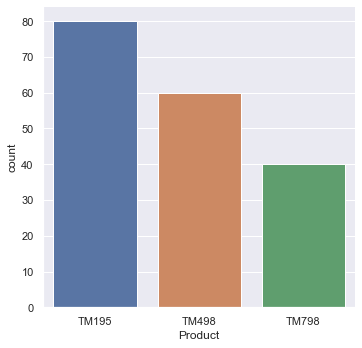

In [59]:
sns.catplot(x = 'Product', data = data, kind = 'count');

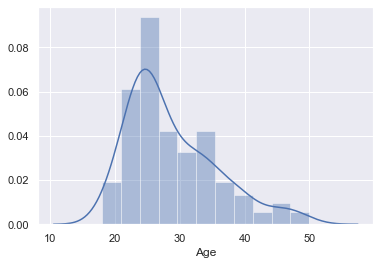

In [60]:
sns.distplot(data['Age']);

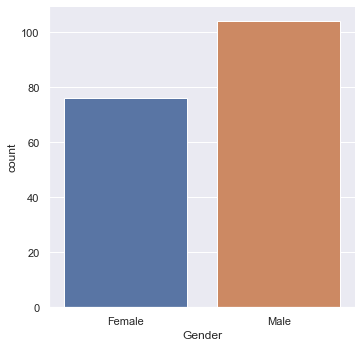

In [61]:
sns.catplot(x = 'Gender', data = data, kind = 'count');

In [62]:
data['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

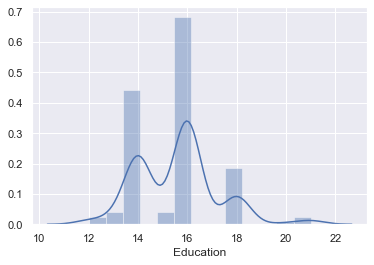

In [63]:
sns.distplot(data['Education']);

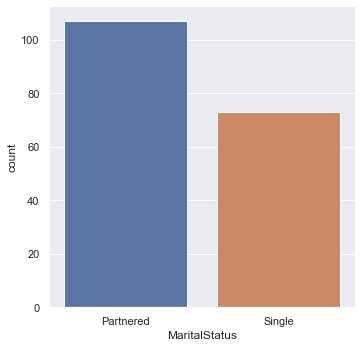

In [64]:
sns.catplot(x = 'MaritalStatus', data = data, kind = 'count');

In [65]:
data['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

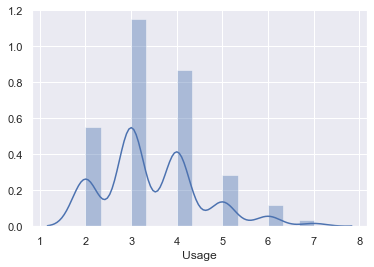

In [66]:
sns.distplot(data[('Usage')]);

In [67]:
data['Usage'].mode()

0    3
dtype: int64

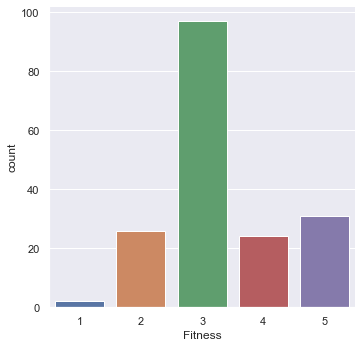

In [68]:
sns.catplot(x = 'Fitness', data = data, kind ='count');

In [69]:
data['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

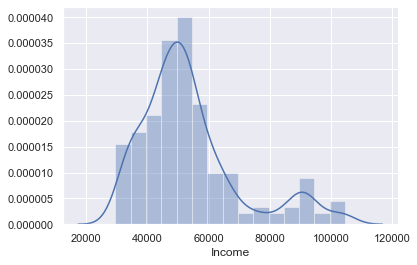

In [70]:
sns.distplot(data["Income"]);

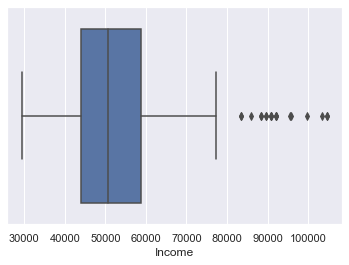

In [71]:
sns.boxplot(data['Income']);

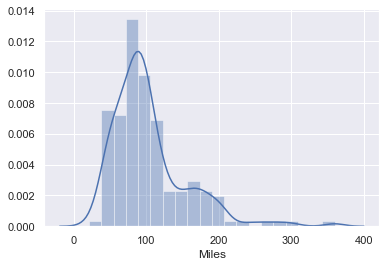

In [72]:
sns.distplot(data['Miles']);

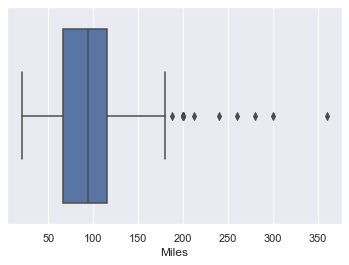

In [85]:
sns.boxplot(data['Miles']);

### Checking 'Miles' by 'Gender'

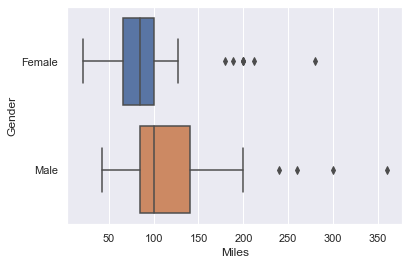

In [86]:
sns.boxplot(data['Miles'], data['Gender']);

### Checking 'Income' spread by 'Gender' for comments

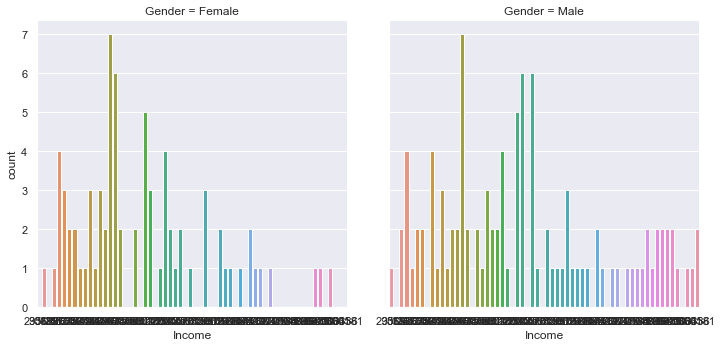

In [87]:
sns.catplot(x="Income", data = data, col="Gender", kind = "count" );

## Multivariate investigations

In [76]:
data.cov()

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


In [77]:
data.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


### Looking at pairplots for possible relationships between variables 

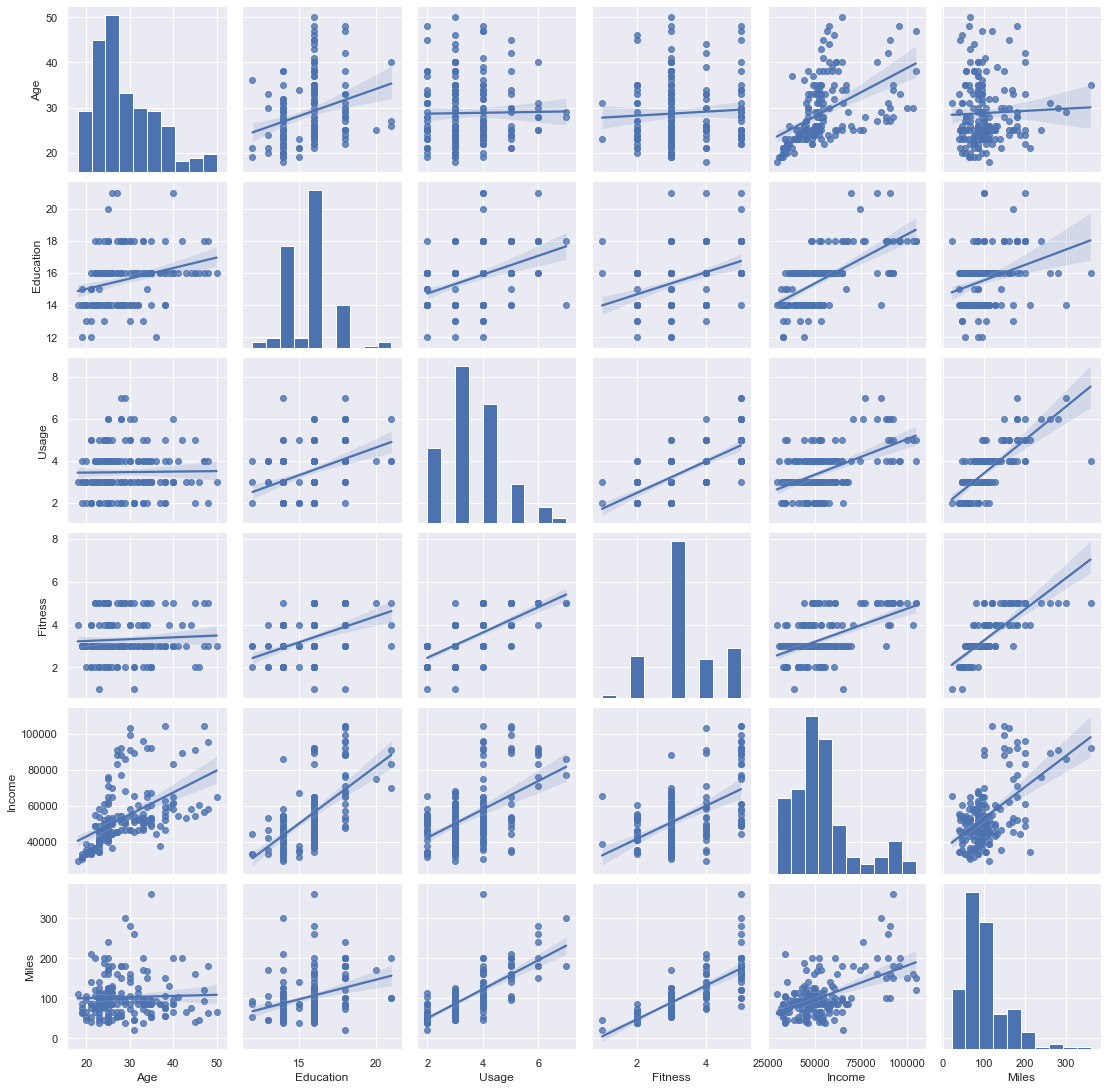

In [95]:
sns.pairplot(data, kind = 'reg')
plt.show()

### Creating a heatmap of above for executive presentation and ease of analysis

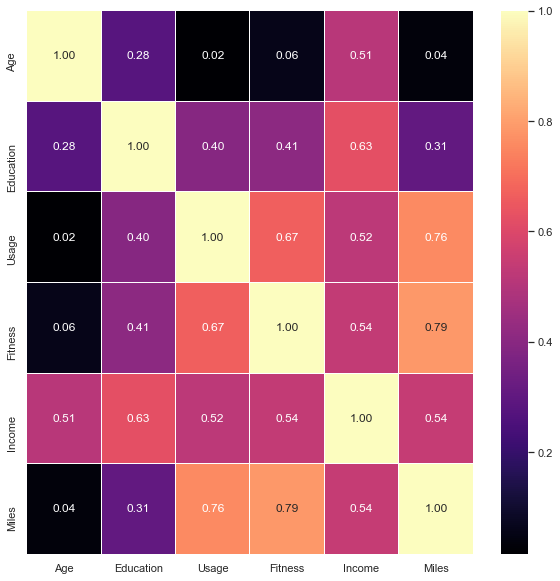

In [79]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data.corr(), ax=ax, annot = True, linewidths = 0.05, fmt ='0.2f', cmap = 'magma')
plt.show()

### Further graph plots required for PPT creation 

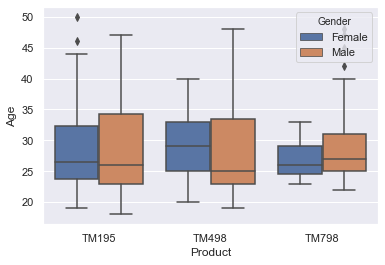

In [80]:
sns.boxplot(data['Product'], data['Age'], hue = data['Gender']);

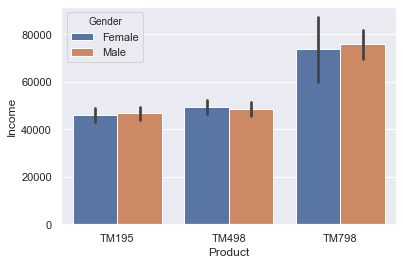

In [81]:
sns.barplot(data['Product'], data['Income'], hue = data['Gender']);

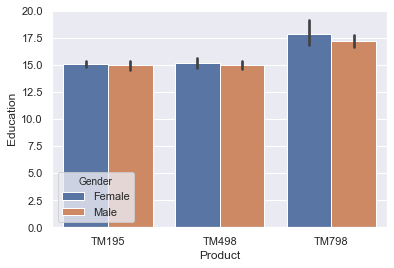

In [90]:
sns.barplot(data['Product'], data['Education'], hue = data['Gender']);

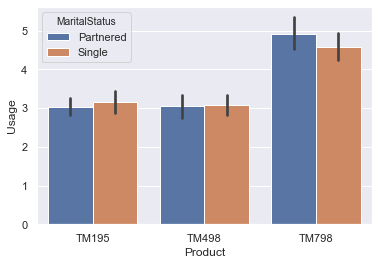

In [92]:
sns.barplot(data['Product'], data['Usage'], hue = data['MaritalStatus']);

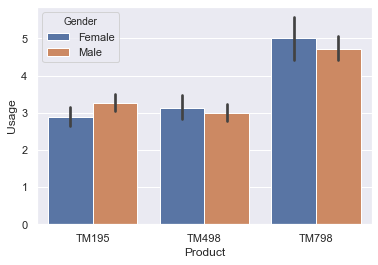

In [88]:
sns.barplot(data['Product'], data['Usage'], hue = data['Gender']);

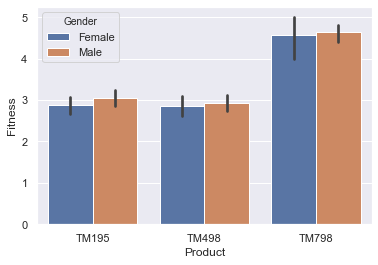

In [93]:
sns.barplot(data['Product'], data['Fitness'], hue = data['Gender']);

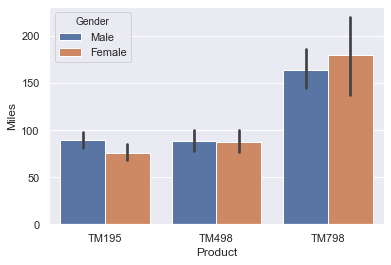

In [116]:
sns.barplot(data['Product'], data['Miles'], hue = data['Gender']);

### Verifying the trends of Fitness with Miles and Usage with Gender and MaritalStatus.

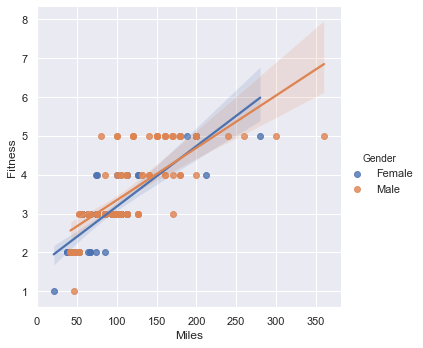

In [97]:
sns.lmplot(y = 'Fitness', x = 'Miles', hue = 'Gender', data = data);

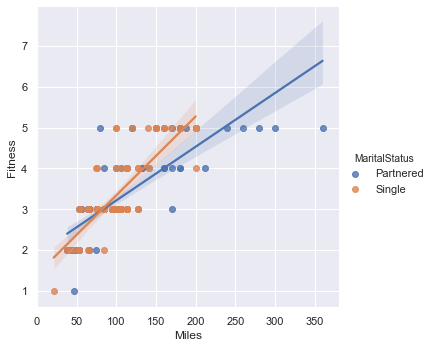

In [101]:
sns.lmplot(y = 'Fitness', x = 'Miles', hue = 'MaritalStatus', data = data);

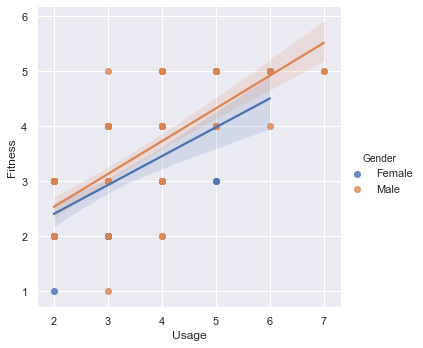

In [104]:
sns.lmplot(y = 'Fitness', x = 'Usage', hue = 'Gender', data = data);

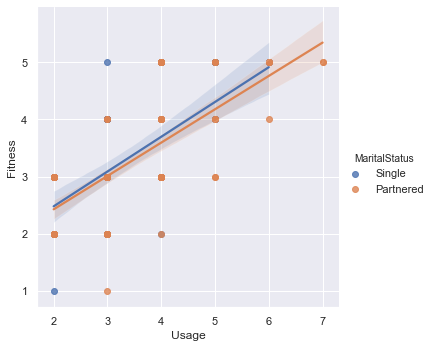

In [117]:
sns.lmplot(y = 'Fitness', x = 'Usage', hue = 'MaritalStatus', data = data);

### Some further investigations (saved but not used)

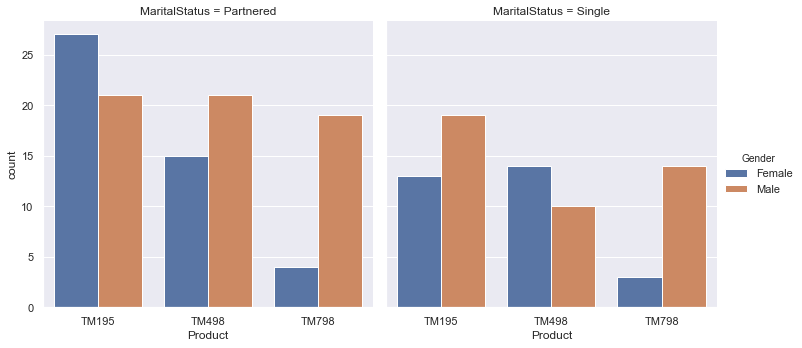

In [103]:
sns.catplot(x = 'Product', hue = "Gender", col = "MaritalStatus", data = data, kind = 'count');

### END